Epoch 1/50


C:\Users\rajka\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


516/516 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 1.4210 - mae: 0.8334 - val_loss: 0.4466 - val_mae: 0.4695
Epoch 2/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4177 - mae: 0.4605 - val_loss: 0.4164 - val_mae: 0.4490
Epoch 3/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3962 - mae: 0.4431 - val_loss: 0.3692 - val_mae: 0.4354
Epoch 4/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3697 - mae: 0.4296 - val_loss: 0.3571 - val_mae: 0.4193
Epoch 5/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3489 - mae: 0.4205 - val_loss: 0.3422 - val_mae: 0.4128
Epoch 6/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3261 - mae: 0.4051 - val_loss: 0.3539 - val_mae: 0.4057
Epoch 7/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.3170 - mae: 0.3966 - val_loss: 0.3305 - val_mae: 0.4106
Epoch 8/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.3275 - mae: 0.3967 - val_loss: 0.3283 - val_mae: 0.4025
Epoch 9/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3098 

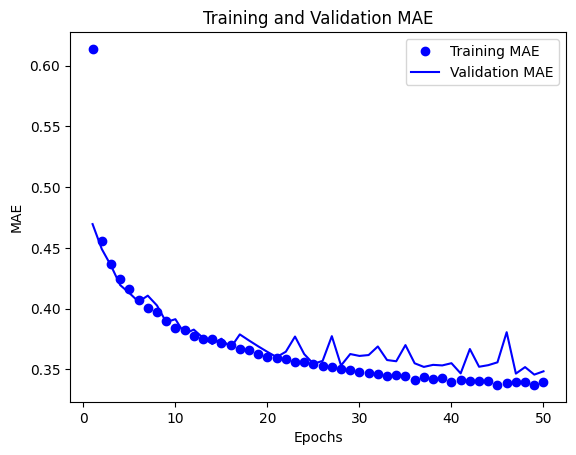

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


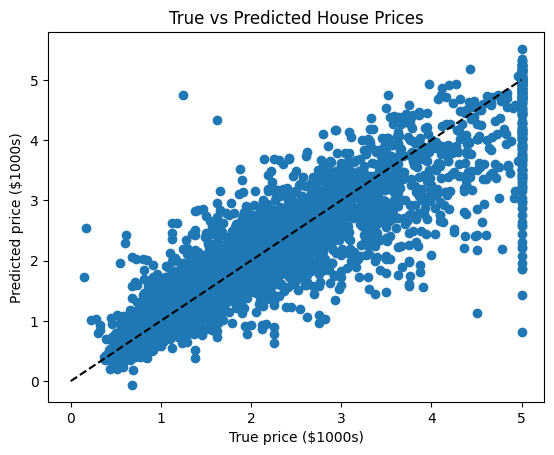

In [17]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Function to load dataset
def load_data(dataset_path=None):
    # If a custom dataset path is provided, load it
    if dataset_path:
        data = pd.read_csv(dataset_path)
        X = data.drop('target', axis=1)  # Assuming the target column is named 'target'
        y = data['target']
    else:
        # If no dataset path is provided, load the California housing dataset by default
        from sklearn.datasets import fetch_california_housing
        housing = fetch_california_housing(as_frame=True)
        X = housing.data
        y = housing.target

    return X, y

# 1. Load your dataset
# If you have your own dataset, just provide the path to the CSV file.
# Example: dataset_path = 'your_dataset_path.csv'
dataset_path = None  # Change this to your custom dataset path, or set to None to use California dataset
X, y = load_data(dataset_path)

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Standardize the data (important for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. Build the neural network model
model = Sequential()

# Input layer (the first hidden layer can be of arbitrary size, here we choose 64 units)
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

# Add more hidden layers if necessary (can adjust units and activation)
model.add(Dense(32, activation='relu'))

# Output layer: Since this is a regression problem, the output layer has 1 unit (for price prediction)
model.add(Dense(1))

# Compile the model (since it's a regression task, we use 'mean_squared_error' loss function)
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# 5. Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# 6. Evaluate the model on the test data
mse_nn, mae_nn = model.evaluate(X_test, y_test)

# Print the evaluation metrics (MSE and MAE)
print('Mean squared error on test data: ', mse_nn)
print('Mean absolute error on test data: ', mae_nn)

# 7. Plot Training vs Validation MAE across epochs
mae = history.history['mae']
val_mae = history.history['val_mae']
epochs = range(1, len(mae) + 1)

plt.plot(epochs, mae, 'bo', label='Training MAE')
plt.plot(epochs, val_mae, 'b', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

# 8. Visualize true vs predicted values
y_pred = model.predict(X_test)

plt.scatter(y_test, y_pred)
plt.plot([0, 5], [0, 5], '--k')  # Ideal line (perfect prediction)
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.title('True vs Predicted House Prices')
plt.show()

# 9. Optional: Save the model if needed
# model.save('house_price_model.h5')  # Uncomment to save the model
